<h2>CS142 - Computability and Complexity </h2>
<h3>Using the Python Automata Simulation Library</h3>

<b>Automata</b> is Python library Copyright 2016-2019 Caleb Evans
Released under the MIT license.<br><br>
This notebook is meant to introduce you to simulating <b>DFAs</b> and <b>NFAs</b> using the Python library <b>Automata</b></br>
The library was selected because it accurately defines and simulates the behavior of automata. Here we focus on these two features of the library:
<UL>
    <li> NFAs and DFAs are created using the exact formal definition (make sure you understand these defintions and document them in your programs), 
    <li> The library respects the limited capability of DFAs and NFAs (e.g., read an input string, accept or reject)
</UL> 
You don't need to go to new lengths to learn concepts you haven't encountered yet, independently of your Python coding level, you should be able to explain and exercise the concepts covered in the first 9 lessons of CS142.

To begin using automata-lib, you need to install the Python package on your computer.
<p align="center"><b> > pip install automata-lib</b></p> 
Make sure you are using the correct python in your computer.  If you want to use this package within anaconda, make sure you are using the pip package that is in anacond (e.g., >/anaconda3/bin/pip install . . )<br>

In [2]:
# First we import the base automaton
from automata.base.automaton import Automaton #Begin by importing the following
from automata.fa.fa import FA   # FA is the class of Finite Automata
from automata.fa.dfa import DFA # DFA is the class of Deterministic Finite Automata depends on FA
from automata.fa.nfa import NFA # NFA is tha class of Nondeterministic Finite Automata depends on FA

<H2> Deterministic Finite Automata (DFA)</H2>

In [3]:
"""
The following code uses Automata-lib to create a DFA.
Recall the formal defintion of a DFA (Q, Sigma, delta, q0, F)
The formal definition requires the 5 tuple <Q, Sigma, delta, q0, F>, where:
Q = Set of possible states
Sigma = Input alphabet
delta = Transition function d: Q X Sigma ---> Q
q0: Start state
F : A set of accept states
This is an example that follows exercise 1.6 (a) from Sipser
L(dfa1) = {w| w begins with a 1 and ends with a 0}
"""
dfa1 = DFA(
    states={'q0', 'q1', 'q2', 'q3'}, #Enumerate the states of the automaton
    input_symbols={'0', '1'}, #The alphabet
    transitions={
        'q0': {'0': 'q3', '1': 'q1'}, #The transition function (delta)
        'q1': {'0': 'q2', '1': 'q1'},
        'q2': {'0': 'q2', '1': 'q1'},
        'q3': {'0': 'q3', '1': 'q3'}
    },
    initial_state='q0', # A single initial state
    final_states={'q2'} # A set of states
)

In [4]:
"""
Recall that DFA recognize regular languages.  Thus, this is the only computation they perform. 
All these computation involve is to determine whether a string is in a language.
Therefore, DFA can only accept a string (reach and accept state) or reject it (doesn't reach 
an accept state by the time it completes reading the input string)

In Automata-lib there are two main methods associate with DFAs:
Method 1: read_input("input-string").
    This method returns the final state of the DFA after it reads all the input string. 
    If the DFA accepts, it reaches one of the accept states, else it rejects by never getting
    to one of the accept states.  If it reject, this implementation returns an error (ends in the wrong state)

Consider the following input string examples of the first method: "10", "100011101010", "100111001"
"""
s = ["10","100011101010","100111001"]
print(':---------------------------------------------:')
print('computing input string 1:',s[0])
print('result of computation: ',dfa1.read_input(s[0]))
print(':---------------------------------------------:')
print('computing string 2:',s[1])
print('result of computation: ',dfa1.read_input(s[1]))
print(':---------------------------------------------:')
print('computing string 3:',s[2])
print('result of computation: ',dfa1.read_input(s[2]))
print(':---------------------------------------------:')


:---------------------------------------------:
computing input string 1: 10
result of computation:  q2
:---------------------------------------------:
computing string 2: 100011101010
result of computation:  q2
:---------------------------------------------:
computing string 3: 100111001


RejectionException: the DFA stopped on a non-final state (q1)

<h2>[EXERCISE 1]</h2> 
<b><i>Submit the answer to this exercise, and all other exercises in this Python Notebook, with your pre-class work for session 3.2.</i></b><br>
<h3>Explain the output from the three <b>dfa1</b> computations in the previous cell.</h3>
-> So, the third string ends up at the q1 state which is not the accept state. it goes from q0 to q1, and then goes back and fourth from q1 and q2 resulting it to end at q1


In [5]:
"""
Method 2: the second method in Automata-lib is:
    accepts_input(input-string).
    This method returns True if the DFA accepted the string, otherwise returns False.
    Thus, it tells us whether the DFA accepts the string or not.

Consider the following input string examples of the second method: "10", "100011101010", "100111001"
"""
s = ["10","100011101010","100111001"]
print(':---------------------------------------------:')
print('computing input string 1:',s[0])
print('result of computation: ',dfa1.accepts_input(s[0]))
print(':---------------------------------------------:')
print('computing string 2:',s[1])
print('result of computation: ',dfa1.accepts_input(s[1]))
print(':---------------------------------------------:')
print('computing string 3:',s[2])
print('result of computation: ',dfa1.accepts_input(s[2]))
print(':---------------------------------------------:')

:---------------------------------------------:
computing input string 1: 10
result of computation:  True
:---------------------------------------------:
computing string 2: 100011101010
result of computation:  True
:---------------------------------------------:
computing string 3: 100111001
result of computation:  False
:---------------------------------------------:


In [6]:
"""
Automata-lib has a method that help its users step through DFA computations.
Unfortunately, it doesn't work properly, but here is a function, DFAIncremental,
that provides a fix. 

DFAIncremental is a function that steps through the DFA computation, 
one input character at a time.  Notice that DFAIncremental is This is after one has define
the DFA). 
"""

def DFAIncremental(DFA, Input):
    StorageList = []
    current_state = DFA.initial_state
    print(current_state)
    for i in Input:                  # Reading the input string, Input, one character a time
        current_state = DFA._get_next_current_state(
            current_state, i)
        print(current_state)
        StorageList.append(current_state)
    if StorageList[(len(StorageList))-1] in DFA.final_states:
        print("The DFA Accepts the Input String")
    else:
        print("The DFA Rejects the Input String")

DFAIncremental(dfa1,"101010101010")

q0
q1
q2
q1
q2
q1
q2
q1
q2
q1
q2
q1
q2
The DFA Accepts the Input String


<H2> Nondeterministic Finite Automata (NFA)</H2>

In [8]:
"""
The following code uses Automata-lib to create an NFA.
Recall the formal defintion of a NFA (Q, Sigma, delta, q0, F)

The formal definition requires the 5 tuple <Q, Sigma, delta, q0, F>, where:
Q = Set of possible states
Sigma = Input alphabet
delta = Transition function d: Q X Sigma ---> P(Q), P(Q) is the power set of Q
q0: Start state
F : A set of accept states
"""
nfa1 = NFA(
    states={'q0', 'q1', 'q2', 'q3'},            # Define set of states (Q)
    input_symbols={'0', '1'},             # Define the alphabet (Sigma)
    transitions={                         # Define the set of transition rules or transition function (delta)
        'q0': {'0': {'q0'}, '1': {'q0','q1'}},
        'q1': { '': {'q2'}, '0': {'q2'}, '1':{'q1'}},
        'q2': {'0': {'q3'}},
        'q3': {},
    },
    initial_state='q0',    # Initial state
    final_states={'q3'}    # Set of accept states
)



<h2>[EXERCISE 2]</h2> 
<h3>Draw the corresponding state diagram for <b>nfa1</b> base on its formal definition.  Include the image of your state diagram in your pre-class work answers for session 3.2.</h3>

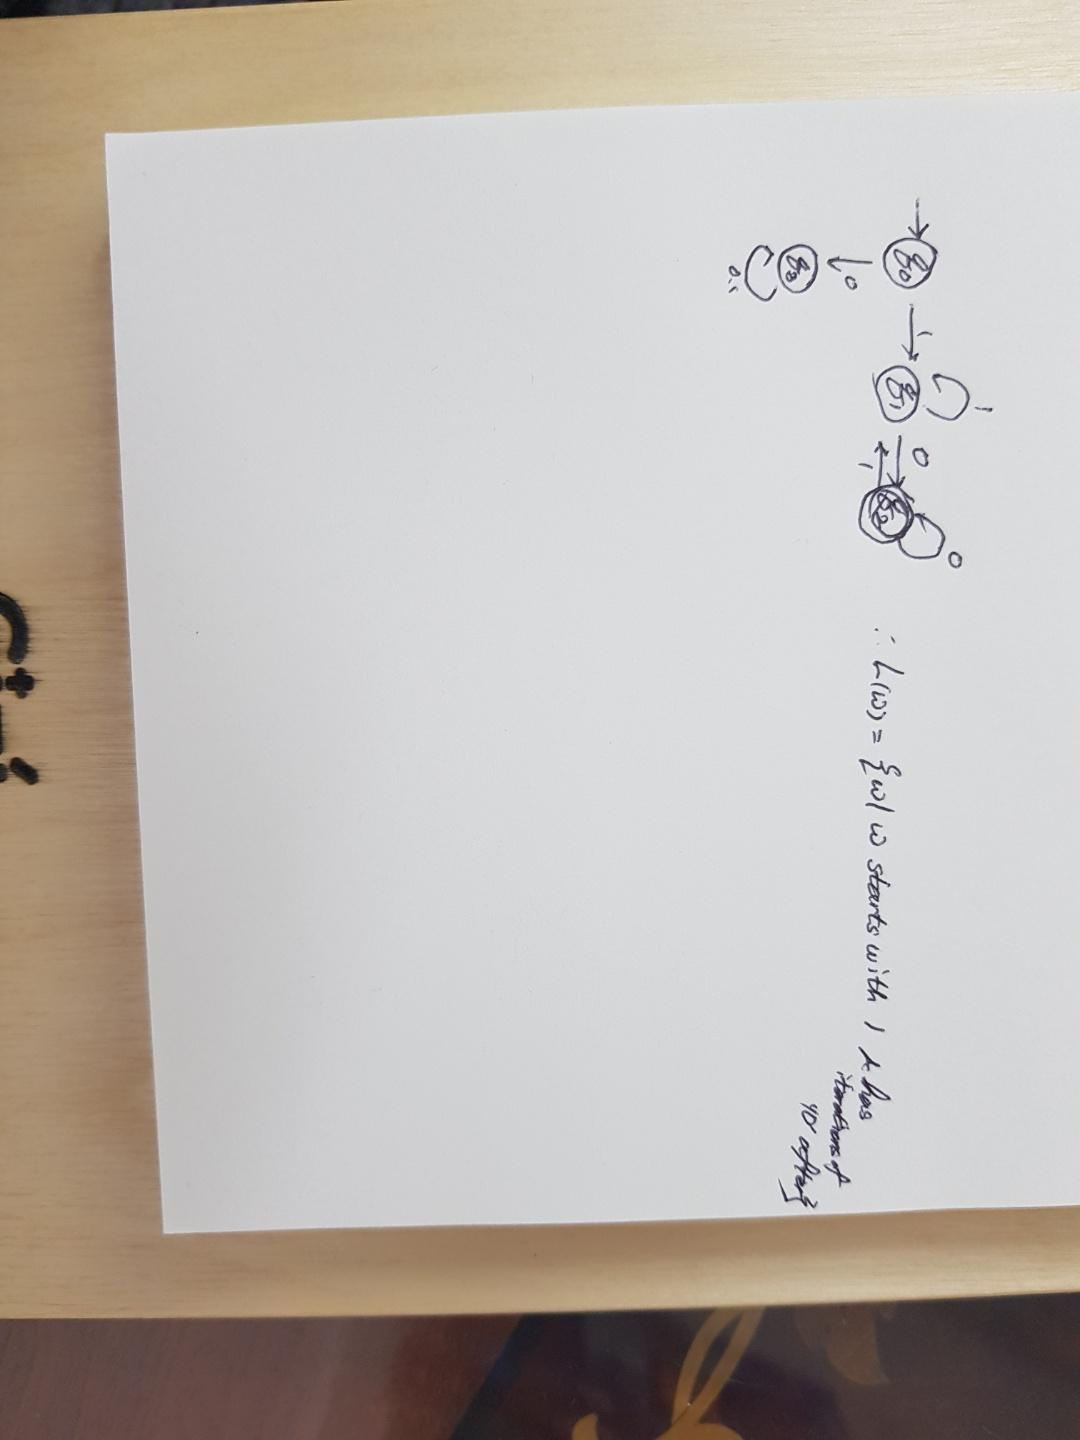

In [10]:
from IPython.display import Image
Image(filename = 'C:/Users/green/Desktop/1.jpg') #DFA image

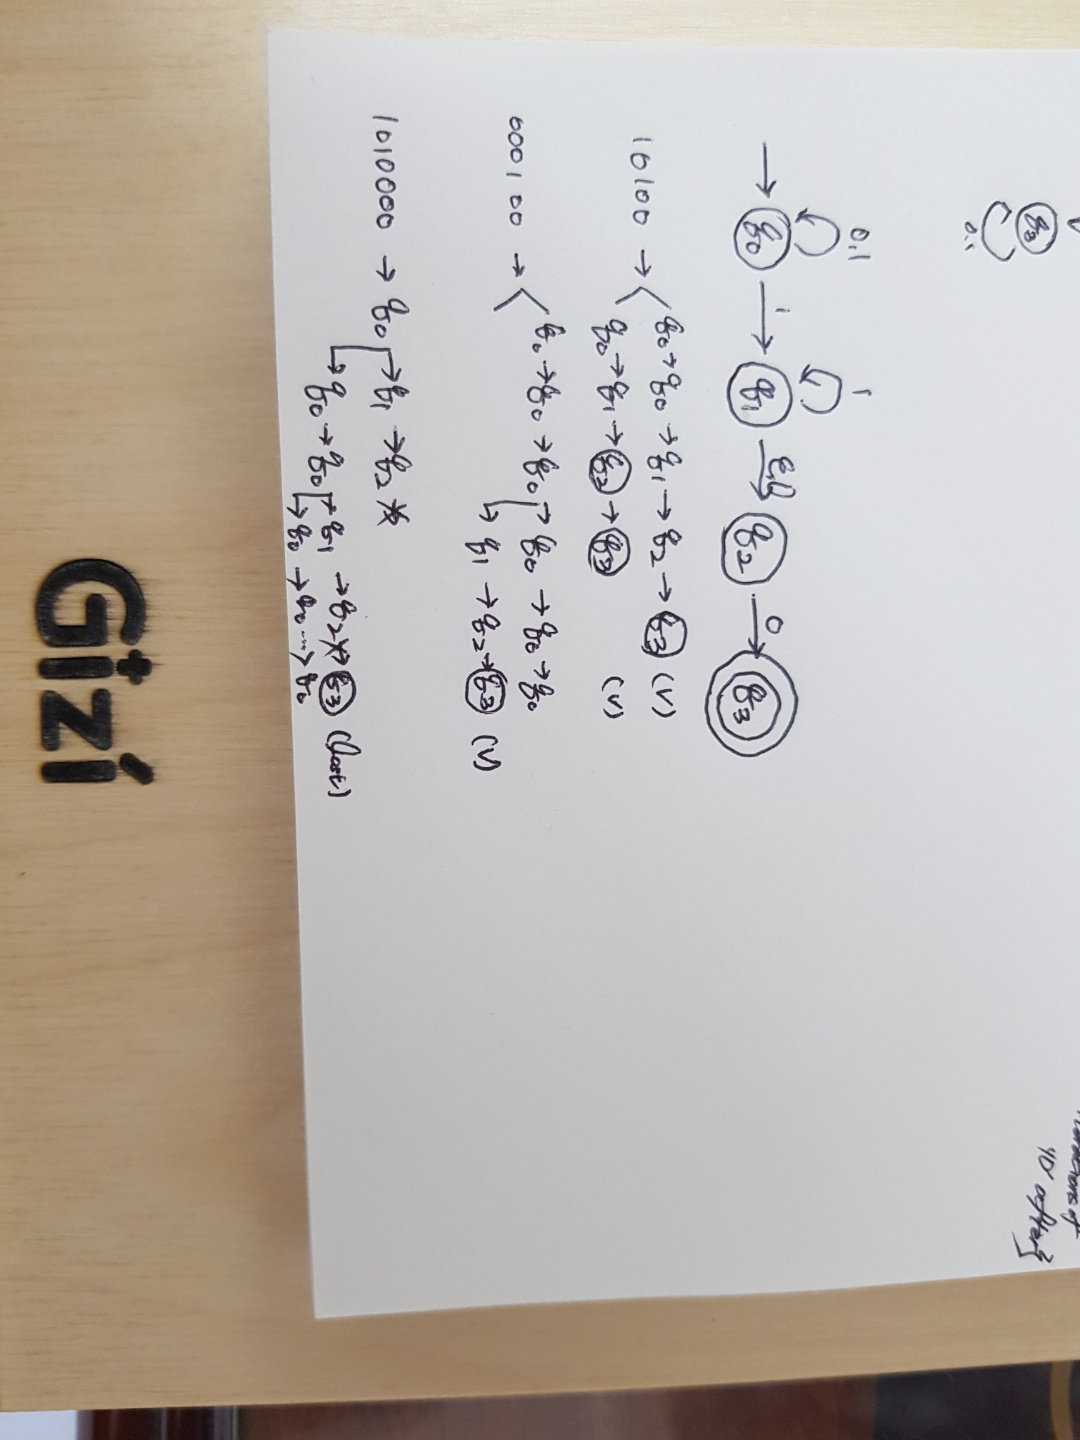

In [23]:
Image(filename = 'C:/Users/green/Desktop/nfa.jpg')

In [20]:
"""
Like DFAs, NFA computations only involve recognizing whether a string is in a language.
Therefore, NFA can only accept or reject a string. NFA nondeterministically can follow
multiple parallel computational branches. 

In Automata-lib there are two main methods associate with NFAs:
Method 1:  read_input("input-string").
    This method returns the list of the states the automaton stops at (the multiple computation branches)
    If an accept state is in the list, then the NFA accepts. Otherwise, it returns an error 
    (if the NFA rejects input)
"""
 # Testing nfa1 with three different input strings
lst = ["10100","000100",'10100', "1010000"] #? 1010 and 10100 works, but not 101000 or having more than 2 0s(because there are no ways to go after q3 with extra input)
for istr in lst:
    print(':---------------------------------------------:')
    print(f"computing input string 1:{istr}")
    print(nfa1.read_input(istr))


:---------------------------------------------:
computing input string 1:10100
{'q3', 'q0'}
:---------------------------------------------:
computing input string 1:000100
{'q3', 'q0'}
:---------------------------------------------:
computing input string 1:10100
{'q3', 'q0'}
:---------------------------------------------:
computing input string 1:1010000


RejectionException: the NFA stopped on all non-final states (q0)

<h2>[EXERCISE 3]</h2> 
<b><i>Submit the answer to this exercise with your pre-class work for session 3.2.</i></b><br> 

<h3>Explain the output from the three <b>nfa1</b> computations in the previous cell.<h3>
    -> Because the q3 does not have anywhere to go, the result becomes automatically false. (why not stop at the position tho.. tragic)

In [12]:
"""
Method 2 is  accepts_input("input-string").
    This method returns True if the NFA accepted the string, otherwise returns False.
    Thus, it tells us whether the NFA accepts or rejects an input string rather than generating an exception.
"""

print(nfa1.accepts_input("10"))
print(nfa1.accepts_input("101"))

True
False


<h2> OTHER DFA AND NFA OPERATIONS</h2>

In [21]:
"""
Two more DFA methods:
 - DFA.minify() : This method attemps to create a DFA that accepts the same language 
                  as the source DFA but with fewer state (optimize the number of DFA states)
 - DFA.from_nfa : Converts an NFA into a corresponding DFA (since for every NFA, there exists an
                  equivalent DFA that accepts the same language)
"""

minimized_dfa = dfa1.minify()
print('MINIMIZED DFA:')
print('DFA States:',minimized_dfa.states) #Inspecting the DFA states to see whether the DFA has been optimized
                     #The output is a DFA with the smallest possible set of states that recognize
                     #the same language
print('DFA Transitions:',minimized_dfa.transitions) #Inspecting the transition rules
print('DFA Accept States:',minimized_dfa.final_states)


MINIMIZED DFA:
DFA States: {'q3', 'q0', 'q1', 'q2'}
DFA Transitions: {'q1': {'1': 'q1', '0': 'q2'}, 'q2': {'1': 'q1', '0': 'q2'}, 'q3': {'1': 'q3', '0': 'q3'}, 'q0': {'1': 'q1', '0': 'q3'}}
DFA Accept States: {'q2'}


In [22]:
"""
Similarly, the NFA object has a method NFA.from_dfa() which converts a DFA into a corresponding NFA that accepts the same
language.
"""
nfa2 = NFA.from_dfa(dfa1)
nfa2.read_input("1100110")

{'q2'}